<a href="https://colab.research.google.com/github/jittima2545/jittima/blob/main/Assignment1_jittma_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA

In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tools for stat/pima-indians-diabetes.csv")
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)'],
      dtype='object')

In [ ]:
# Remove the class variable from the data set
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

# Split the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def get_xy():
  X = df.drop('Class variable (0 or 1)', axis=1)
  y = df['Class variable (0 or 1)']
  return X,y

In [ ]:
X

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable (0 or 1), Length: 768, dtype: int64

# **1.Recursive Feature Elimination (RFE)**

## RFE for Classification

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = get_xy()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.710 (0.059)


In [ ]:
print(n_scores)

[0.67532468 0.76623377 0.75324675 0.83116883 0.76623377 0.68831169
 0.67532468 0.75324675 0.69736842 0.57894737 0.68831169 0.63636364
 0.75324675 0.7012987  0.80519481 0.72727273 0.75324675 0.67532468
 0.75       0.69736842 0.72727273 0.76623377 0.77922078 0.63636364
 0.67532468 0.63636364 0.66233766 0.76623377 0.63157895 0.64473684]


In [ ]:
X

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable (0 or 1), Length: 768, dtype: int64

# **2.Stat feature selection**

## Classification Feature Selection

In [ ]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import f_classif
# define feature selection
X,y = get_xy()
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 2)


In [ ]:
X_selected

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

# **3.Permutation Feature Importance**

(ความสำคัญของคุณลักษณะการเรียงสับเปลี่ยน)

## permutation feature importance with knn for classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X,y = get_xy()
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **4.Comparison in model development**

## Number of features

In [ ]:
##RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Assume X_train, y_train are your training data
model_ = DecisionTreeClassifier()
rfe = RFE(estimator=model_rfe, n_features_to_select=5)
pipeline_rfe = Pipeline(steps=[('s', rfe), ('m', model_rfe)])
scores_rfe = cross_val_score(pipeline_rfe, X_train, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by RFE: {rfe.n_features_to_select}')
print(f'Mean Accuracy with RFE: {scores_rfe.mean()}')

Number of features selected by RFE: 5
Mean Accuracy with RFE: 0.7133013461282154


In [ ]:
##Stat feature (Classication)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are your training data
X_selected_kbest = SelectKBest(f_classif, k=5).fit_transform(X_train, y_train)

# Create a model (e.g., RandomForestClassifier)
model_kbest = RandomForestClassifier(n_estimators=100)

# Evaluate the model using cross-validation
scores_kbest = cross_val_score(model_kbest, X_selected_kbest, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by SelectKBest: {X_selected_kbest.shape[1]}')
print(f'Mean Accuracy with SelectKBest: {scores_kbest.mean()}')


Number of features selected by SelectKBest: 5
Mean Accuracy with SelectKBest: 0.7573903771824603


In [ ]:
##Permutation Feature
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are your training data
model_permutation = RandomForestClassifier(n_estimators=1000)
model_permutation.fit(X_train, y_train)

result_permutation = permutation_importance(model_permutation, X_train, y_train, n_repeats=10, random_state=42)

perm_importance = result_permutation.importances_mean
selected_features_permutation = [index for index, importance in enumerate(perm_importance) if importance > 0]
score_permu = cross_val_score(model_permutation,X_train, y_train, cv=5, scoring='accuracy')
print(f'Number of features selected by Permutation Feature Importance: {len(selected_features_permutation)}')
print(f'Mean Accuracy with Selected by Permutation Feature Importance: {score_permu.mean()}')


Number of features selected by Permutation Feature Importance: 8
Mean Accuracy with Selected by Permutation Feature Importance: 0.7785019325603093


-----
//The cross-validated score
คือการวัดว่าแบบจำลองทำงานได้ดีเพียงใดกับข้อมูล


จากข้อมูลพบว่า พบว่า Permutation Feature Importance เป็นวิธีดีที่สุดในบรรดาสามวิธีเมื่อเปรียบเทียบ โดยใช้ Number of features

----


## Selected features

In [ ]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define the dataset
X, y = get_xy()
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.97


In [ ]:
#evaluation of a model using 5 features chosen with REF
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = get_xy()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using RFE
fs = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=5)
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))


Accuracy: 77.27%


In [ ]:
# evaluation of a model using 5 features chosen with Stat feature selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2

X, y = get_xy()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)
X_train_fs = k_best.fit_transform(X_train, y_train)
X_test_fs = k_best.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


In [ ]:
#evaluation of a model using 8 features chosen with Permutation Feature Importance

X, y = get_xy()
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to get initial feature importance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get indices of top 8 features based on permutation importance
top_features_indices = (-perm_importance.importances_mean).argsort()[:8]

# Select the top 8 features
X_train_perm_importance = X_train.iloc[:, top_features_indices]
X_test_perm_importance = X_test.iloc[:, top_features_indices]

# Fit the Logistic Regression model on selected features
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_perm_importance, y_train)

# Evaluate the model
yhat = lr_model.predict(X_test_perm_importance)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


จากการ Result พบว่า model using 5 features chosen with REF ให้ประสิทธิภาพอยู่ที่ Accuracy: 77.27% ซึ่งสูงที่สุดจากท้ั้งหมด 3 วิธี

## Feature Ranking

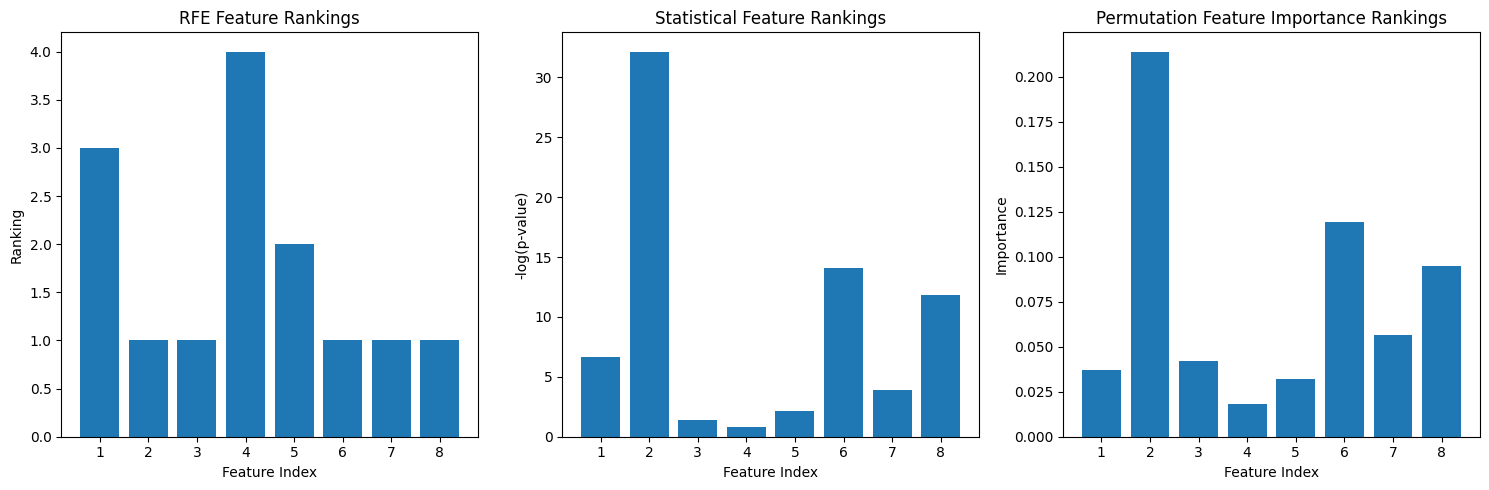

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

X, y = get_xy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
clf.fit(X, y)

# Function to get feature rankings from RFE
def get_rfe_feature_rankings(X, y, clf):
    rfe = RFE(clf, n_features_to_select=5)
    rfe.fit(X, y)
    rankings = rfe.ranking_
    return rankings

# Function to get feature rankings from Statistical feature selection
def get_stat_feature_rankings(X, y):
    skb = SelectKBest(f_classif, k='all')
    skb.fit(X, y)
    rankings = -np.log10(skb.pvalues_)
    return rankings

# Function to get feature rankings from Permutation Feature Importance
def get_permutation_feature_rankings(X, y, clf):
    result = permutation_importance(clf, X, y, n_repeats=8, random_state=42)
    rankings = result.importances_mean
    return rankings

# Get feature rankings for each method
rfe_rankings = get_rfe_feature_rankings(X_train, y_train, clf)
stat_rankings = get_stat_feature_rankings(X_train, y_train)
perm_rankings = get_permutation_feature_rankings(X_train, y_train, clf)

# Plot feature rankings
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(rfe_rankings) + 1), rfe_rankings)
plt.title('RFE Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Ranking')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(stat_rankings) + 1), stat_rankings)
plt.title('Statistical Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('-log(p-value)')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(perm_rankings) + 1), perm_rankings)
plt.title('Permutation Feature Importance Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()



Feature Index: This column shows the index of the features used in the model. The index ranges from 0 to 40.
RFE Feature Rankings: This column shows the ranking of the features based on the Recursive Feature Elimination (RFE) method. The ranking ranges from 0 to 20.0, with lower values indicating more important features.
Statistical Feature Rankings: This column shows the ranking of the features based on statistical measures. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.
Permutation Feature Importance Rankings: This column shows the ranking of the features based on permutation feature importance. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.



---
โดยรวมแล้ว feature index 2,3,6,7 และ 8 ของวิธี REF เหมาะสม

โดยรวมแล้ว feature index 1,3,4,5 และ 7 ของวิธี Stat feature selection เหมาะสม

โดยรวมแล้ว feature index 2 เพียงอันเดียวที่ไม่เหมาะสม




